In [4]:
# !IMPORTANT - to run this notebook download first train_and_test2.csv dataset from https://www.kaggle.com/datasets/heptapod/titanic and put it in data/ folder

# import libraries
from sklearn.model_selection import train_test_split
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, ensemble
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# import .csv data into DataFrame
passengers = pd.read_csv('data/train_and_test2.csv')
passengers.head()


,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


<Axes: >

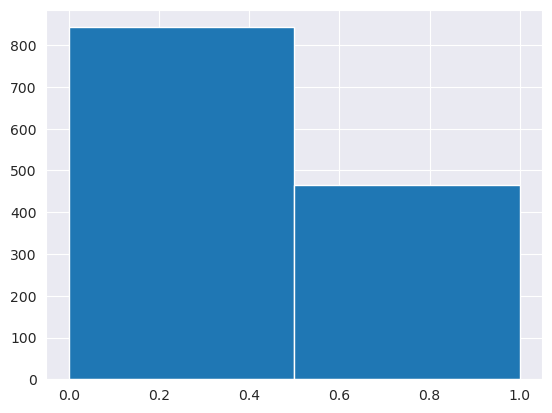

In [5]:
# Gender distribution
passengers['Sex'].hist(bins=2) 

<Axes: >

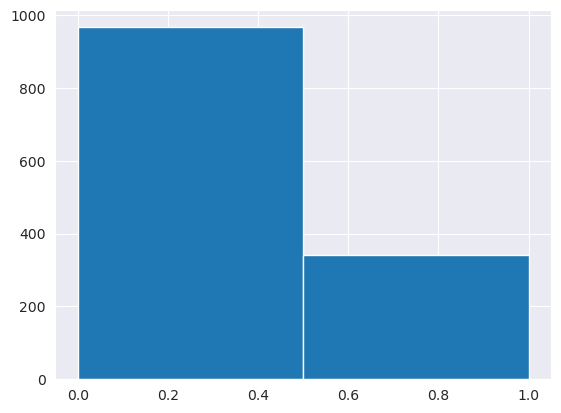

In [6]:
# distribution of "survived"
passengers['2urvived'].hist(bins=2) 

<Axes: >

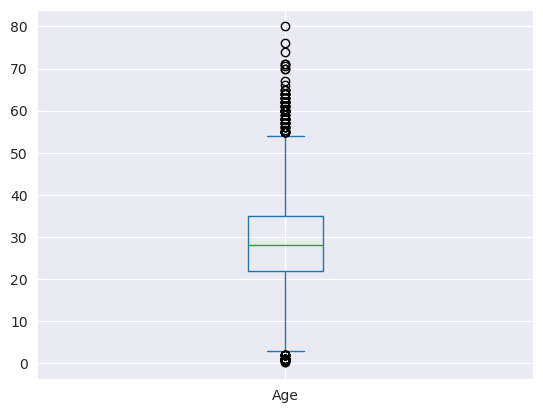

In [7]:
# distribution of Age
passengers['Age'].plot.box() 

In [8]:
# removed empty columns and not needed 
passengers.drop(['Passengerid', 'zero', 'zero.1', 'zero.2', 'zero.3', 'zero.4', 'zero.5', 'zero.6', 'zero.7',
                 'zero.8', 'zero.9', 'zero.10', 'zero.11', 'zero.12', 'zero.13', 'zero.14', 'zero.15', 'zero.16',
                 'zero.17', 'zero.18'], axis=1, inplace = True)
passengers

,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,2urvived
0,22.0,7.2500,0,1,0,3,2.0,0
1,38.0,71.2833,1,1,0,1,0.0,1
2,26.0,7.9250,1,0,0,3,2.0,1
3,35.0,53.1000,1,1,0,1,2.0,1
4,35.0,8.0500,0,0,0,3,2.0,0
...,...,...,...,...,...,...,...,...
1304,28.0,8.0500,0,0,0,3,2.0,0
1305,39.0,108.9000,1,0,0,1,0.0,0
1306,38.5,7.2500,0,0,0,3,2.0,0
1307,28.0,8.0500,0,0,0,3,2.0,0


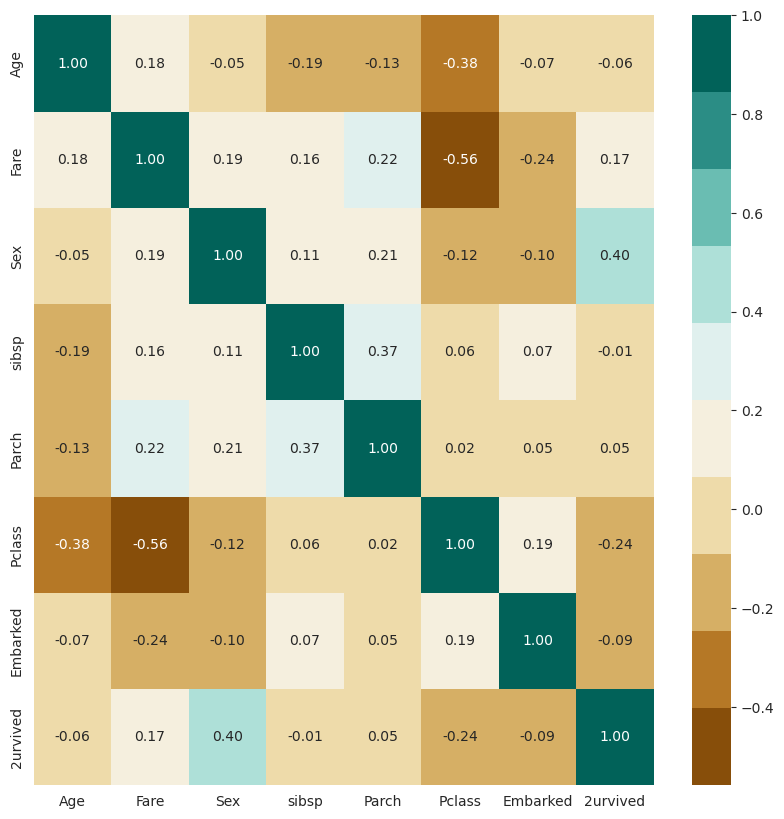

In [9]:
# generate correlation matrix

correlations = passengers.corr()
fig, ax = plt.subplots(figsize=(10, 10))

colormap = sns.color_palette("BrBG", 10)

sns.heatmap(correlations, 
    cmap=colormap, 
    annot=True, 
    fmt=".2f")
ax.set_yticklabels(passengers.columns);

plt.show()

# columns meanings:
# Variable	Definition	Key
# survival 	Survival 	0 = No, 1 = Yes
# pclass 	Ticket class 	1 = 1st, 2 = 2nd, 3 = 3rd
# sex 	Sex 	
# Age 	Age in years 	
# sibsp 	# of siblings / spouses aboard the Titanic 	
# parch 	# of parents / children aboard the Titanic 	
# ticket 	Ticket number 	
# fare 	Passenger fare 	
# cabin 	Cabin number 	
# embarked 	Port of Embarkation 	C = Cherbourg, Q = Queenstown, S = Southampton

In [10]:
# fill missing values
passengers.fillna(passengers.mean(), inplace=True)
passengersCopy = passengers.copy()

In [11]:
#what if some of columns were categorical instead numeric? 
maps = {
    0: 'm',
    1: 'w'
}
passengers['Sex'] = passengers['Sex'].apply(lambda x: maps[x])
print(passengers)

###################################################################

maps = {
    'm': 0,
    'w': 1
}
passengers['Sex'] = passengers['Sex'].apply(lambda x: maps[x])
passengers

       Age      Fare Sex  sibsp  Parch  Pclass  Embarked  2urvived
0     22.0    7.2500   m      1      0       3       2.0         0
1     38.0   71.2833   w      1      0       1       0.0         1
2     26.0    7.9250   w      0      0       3       2.0         1
3     35.0   53.1000   w      1      0       1       2.0         1
4     35.0    8.0500   m      0      0       3       2.0         0
...    ...       ...  ..    ...    ...     ...       ...       ...
1304  28.0    8.0500   m      0      0       3       2.0         0
1305  39.0  108.9000   w      0      0       1       0.0         0
1306  38.5    7.2500   m      0      0       3       2.0         0
1307  28.0    8.0500   m      0      0       3       2.0         0
1308  28.0   22.3583   m      1      1       3       0.0         0

[1309 rows x 8 columns]


,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,2urvived
0,22.0,7.2500,0,1,0,3,2.0,0
1,38.0,71.2833,1,1,0,1,0.0,1
2,26.0,7.9250,1,0,0,3,2.0,1
3,35.0,53.1000,1,1,0,1,2.0,1
4,35.0,8.0500,0,0,0,3,2.0,0
...,...,...,...,...,...,...,...,...
1304,28.0,8.0500,0,0,0,3,2.0,0
1305,39.0,108.9000,1,0,0,1,0.0,0
1306,38.5,7.2500,0,0,0,3,2.0,0
1307,28.0,8.0500,0,0,0,3,2.0,0


In [12]:
# create training set
X = passengers.drop('2urvived', axis=1).to_numpy()
X

array([[22.    ,  7.25  ,  0.    , ...,  0.    ,  3.    ,  2.    ],
       [38.    , 71.2833,  1.    , ...,  0.    ,  1.    ,  0.    ],
       [26.    ,  7.925 ,  1.    , ...,  0.    ,  3.    ,  2.    ],
       ...,
       [38.5   ,  7.25  ,  0.    , ...,  0.    ,  3.    ,  2.    ],
       [28.    ,  8.05  ,  0.    , ...,  0.    ,  3.    ,  2.    ],
       [28.    , 22.3583,  0.    , ...,  1.    ,  3.    ,  0.    ]])

In [13]:
# create labels for training set
y = passengers.loc[:, '2urvived'].to_numpy()
y

array([0, 1, 1, ..., 0, 0, 0])

In [14]:
# split data for training model and validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345) 

In [15]:
# universal method for training and evaluation of models

def train_model(classifier, feature_vector_train, label, feature_vector_valid):
    # train model
    classifier.fit(feature_vector_train, label)
    
    # generate labels for validation set
    predictions = classifier.predict(feature_vector_valid)
    
    # evealuate model based on test set labels
    scores = list(metrics.precision_recall_fscore_support(predictions, y_test))
    score_vals = [
        scores[0][0],
        scores[1][0],
        scores[2][0]
    ]
    score_vals.append(metrics.accuracy_score(predictions, y_test))
    return score_vals

In [16]:
# MODEL 1 - logistic regression
accuracy = train_model(linear_model.LogisticRegression(), X_train, y_train, X_test)
accuracy_compare = {'LR': accuracy}
print ("LR: ", accuracy)

LR:  [0.9329896907216495, 0.8190045248868778, 0.8722891566265061, 0.7977099236641222]


In [17]:
# MODEL 2 - Support Vector Machine
accuracy = train_model(svm.SVC(), X_train, y_train, X_test)
accuracy_compare['SVM'] = accuracy
print ("SVM" , accuracy)

SVM [0.979381443298969, 0.7509881422924901, 0.8501118568232662, 0.7442748091603053]


In [18]:
# MODEL 3 - Random Forest Tree 
accuracy = train_model(ensemble.RandomForestClassifier(), X_train, y_train, X_test)
accuracy_compare['RF'] = accuracy
print ("RF: ", accuracy)

RF:  [0.8865979381443299, 0.8349514563106796, 0.86, 0.7862595419847328]


<Axes: >

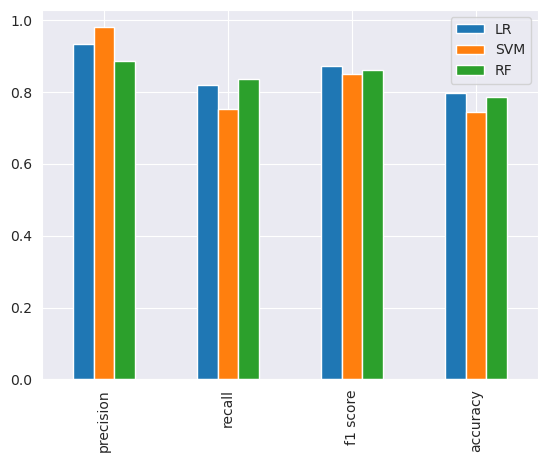

In [19]:
# compare models

df_compare = pd.DataFrame(accuracy_compare, index = ['precision', 'recall', 'f1 score', 'accuracy'])
df_compare.plot(kind='bar')

In [20]:
# corrections and adjustments - use artificial neural network

# MODEL 4 - neural network
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
accuracy = train_model(mlp, X_train, y_train, X_test)
accuracy_compare['neural network'] = accuracy
print ("neural network" , accuracy)

neural network [0.9175257731958762, 0.839622641509434, 0.8768472906403941, 0.8091603053435115]


In [21]:
#0.979381443298969, 0.7509881422924901, 0.8501118568232662, 0.7442748091603053]

In [22]:
# corrections and adjustments - use different hyperparameters

# MODEL 5 - Support Vector Machine
accuracy = train_model(svm.SVC(gamma='auto'), X_train, y_train, X_test)
accuracy_compare['SVM'] = accuracy
print ("SVM gamma='auto'" , accuracy)

# MODEL 6 - Support Vector Machine
accuracy = train_model(svm.SVC(kernel='sigmoid'), X_train, y_train, X_test)
accuracy_compare['SVM'] = accuracy
print ("SVM kernel='sigmoid'" , accuracy)

# MODEL 7 - Support Vector Machine
accuracy = train_model(svm.SVC(degree=4), X_train, y_train, X_test)
accuracy_compare['SVM'] = accuracy
print ("SVM degree=4" , accuracy)

SVM gamma='auto' [0.9639175257731959, 0.751004016064257, 0.8442437923250564, 0.7366412213740458]
SVM kernel='sigmoid' [0.8608247422680413, 0.7660550458715596, 0.8106796116504854, 0.7022900763358778]
SVM degree=4 [0.979381443298969, 0.7509881422924901, 0.8501118568232662, 0.7442748091603053]
